# Week 1 - Univariate linear regression

- hide snippets
- description of linear regression
- how to calculate w and b
- how to make predictions
- what is the measure
- data used description

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
class UnivariateLinearRegression:
    def __init__(self):
        self.x = None
        self.y = None
        self.w = None
        self.b = None
        
    def train(self, x, y):
        self.x = x
        self.y = y
        self.w = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
        self.b = np.mean(y) - self.w * np.mean(x)

    def pred(self, x):
        y = self.w * x + self.b
        return y
    
    def mse(self, x=None, y=None):
        if x is None:
            x = self.x
        if y is None:
            y = self.y
        y_pred = self.pred(x)
        mse = np.mean((y - y_pred)**2)
        return mse
    
    def score(self, x=None, y=None):
        return -self.mse(x, y)



/tmp/ipykernel_6756/3406483552.py:8: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../datasets/weatherstations/GM000003342.csv', names = names)


training MSE : 56.6761
test MSE     : 75.6696


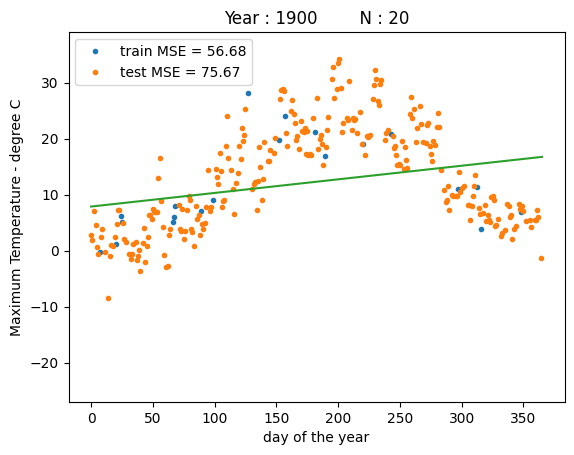

In [15]:

def load_temperature_data(year = None):
    """
    load data from a weather station in Potsdam
    
    """

    names = ['station', 'date' , 'type', 'measurement', 'e1','e2', 'E', 'e3']
    data = pd.read_csv('../datasets/weatherstations/GM000003342.csv', names = names)
    # convert the date column to datetime format
    data['date'] = pd.to_datetime(data['date'], format="%Y%m%d") # 47876 unique days
    types = data['type'].unique()

    tmax = data[data['type']=='TMAX'][['date','measurement']] # Maximum temperature (tenths of degrees C), 47876
    tmin = data[data['type']=='TMIN'][['date','measurement']] # Minimum temperature (tenths of degrees C), 47876
    prcp = data[data['type']=='PRCP'][['date','measurement']] # Precipitation (tenths of mm), 47876
    snwd = data[data['type']=='SNWD'][['date','measurement']] # Snow depth (mm), different shape
    tavg = data[data['type']=='TAVG'][['date','measurement']] # average temperature, different shape 1386
    arr = np.array([tmax.measurement.values,tmin.measurement.values, prcp.measurement.values]).T 

    df = pd.DataFrame(arr/10.0, index=tmin.date, columns=['TMAX', 'TMIN', 'PRCP']) # compile data in a dataframe and convert temperatures to degrees C, precipitation to mm

    if year is not None:
        df = df[pd.to_datetime(f'{year}-1-1'):pd.to_datetime(f'{year}-12-31')]
    
    df['days'] = (df.index - df.index.min()).days
    return df


year = 1900
df = load_temperature_data(year = year)


np.random.seed(2)
idx = np.random.permutation(df.shape[0])

idx_train = idx[0:100]
idx_test = idx[100:]

data_train = df.iloc[idx_train]
data_test = df.iloc[idx_test]

def plot_regression(N_train = 10):
    x_train = data_train.days.values[:N_train] * 1.0
    y_train = data_train.TMAX.values[:N_train]

    reg = UnivariateLinearRegression()
    reg.train(x_train, y_train)

    x_days = np.arange(366)
    y_days_pred = reg.pred(x_days)

    x_test = data_test.days.values * 1.0
    y_test = data_test.TMAX.values
    y_test_pred = reg.pred(x_test)
    print("training MSE : %.4f" % reg.mse())
    print("test MSE     : %.4f" % reg.mse(x_test, y_test))

    fig = plt.figure()
    plt.plot(x_train,y_train,'.')
    plt.plot(x_test,y_test,'.')
    plt.legend(["train MSE = %.2f" % reg.mse(),"test MSE = %.2f" % reg.mse(x_test, y_test)])
    plt.plot(x_days,y_days_pred)
    plt.ylim([-27,39])
    plt.xlabel("day of the year")
    plt.ylabel("Maximum Temperature - degree C")
    plt.title("Year : %i        N : %i" % (year, N_train))
    return (fig, reg)

N = 20
fig, reg = plot_regression(N)
plt.show()